<h1><center>FIFA</center></h1> 

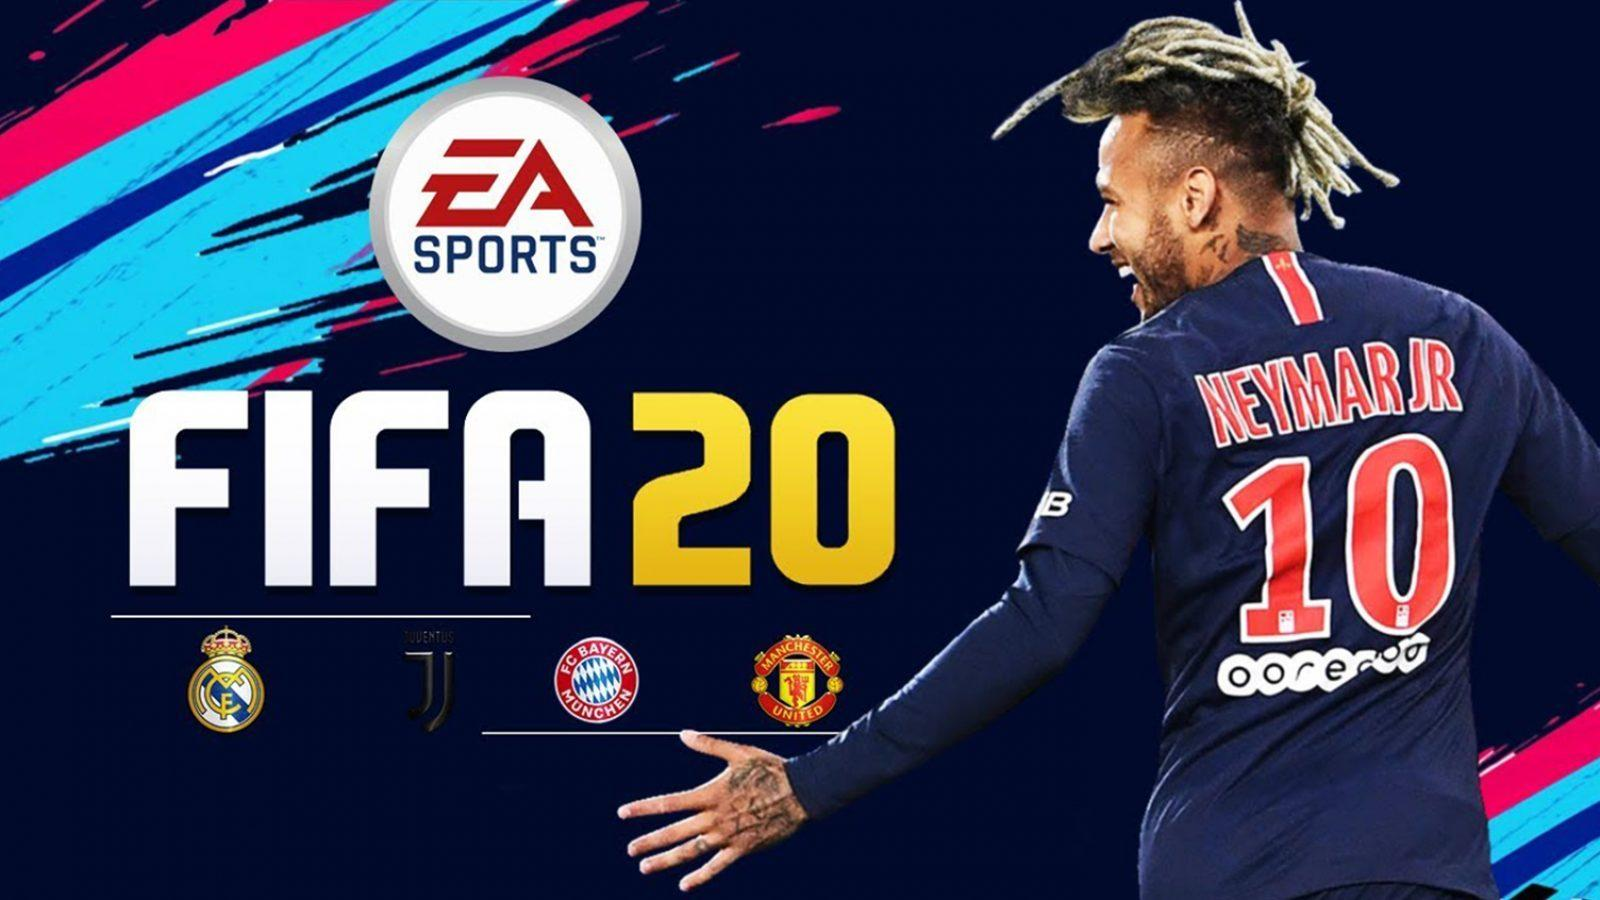


- **Fédération Internationale de Football Association** in French, English: International Federation of Association Football).
- It is a non-profit organization that describes itself as an international governing body of association football, Futsal, and beach soccer. It is the highest governing body of association football.

- FIFA was founded in 1904, to oversee international competition among the national associations of Belgium, Denmark, France, Germany, the Netherlands, Spain, Sweden and Switzerland. Headquartered in Zürich, Switzerland, its membership now comprises 211 national associations.

- These national associations must each also be members of one of the six regional confederations into which the world is divided: Africa, Asia, Europe, North & Central America and the Caribbean, Oceania and South America.

- Today, FIFA outlines a number of objectives in the organizational Statutes, including growing association football internationally, providing efforts to ensure it is accessible to everyone, and advocating for integrity and fair play.

- FIFA is responsible for the organization and promotion of association football's major international tournaments, notably the World Cup which commenced in 1930 and the Women's World Cup which commenced in 1991. 

- Although FIFA does not solely set the rules of the game, that being the responsibility of the International Football Association Board of which FIFA is a member, it applies and enforces the rules across all FIFA competitions.

# Steps
-  **Import all Libraries for WebScarpping , Analysis and Visualization**
-  **WebScrape the data from Sofifa.com**
-  **Convert the webscarped data into DataFrame.**
-  **Convert the DataFrame into Excel Sheet.**
-  **DO Exploration Analysis**
-  **Explore Data Analysis**
-  **DO Visualizations**

> - **Link for WebScrape the Website is**  https://sofifa.com/players?offset=

## Web Scraping

- Web Scraping is used to Scrape the website, its an scarpping method to obtain large amounts of data from websites. 
- Most of this data is unstructured data in an HTML format which is then converted into structured data in a spreadsheet or a database so that it can be used in various applications. 
- This is the best option but there are other sites that don’t allow users to access large amounts of data in a structured form or they are simply not that technologically advanced. 
- In that situation, it’s best to use Web Scraping to scrape the website for data.




> **Beautiful Soup**
> - Install the Beautiful Soup with  this command :- **pip install beautifulsoup4** 
> - **Reference link for Beautiful Soup :** https://beautiful-soup-4.readthedocs.io/en/latest/
- Beautiful Soup is a Python library for pulling data out of HTML and XML files.
- It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. 
- It commonly saves programmers hours or days of work.
- The latest Version of Beautifulsoup is v4.9.3 as of now.


> **Regular Expression:**
> - **Reference link for RE :** https://docs.python.org/3/howto/regex.html
> - module is import re 
- Regular Expressions, often shortened as regex, are a sequence of characters used to check whether a pattern exists in a given text (string) or not. If you've ever used search engines, search and replace tools of word processors and text editors - you've already seen regular expressions in use. They are used at the server side to validate the format of email addresses or passwords during registration, used for parsing text data files to find, replace, or delete certain string, etc. They help in manipulating textual data, which is often a prerequisite for data science projects involving text mining.

> **PANDAS :**
> - **Reference link for Pandas :** https://pandas.pydata.org/docs/reference/index.html 
    - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc.
>    
**NUMPY:**
> - **Reference link for Numpy :**  https://numpy.org/doc/stable/reference/
       - It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.
       
       
 ### Data Visualizations
 - Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions
       
**MATPLOTLIB**
>-**Reference link for Matplotlib :** https://scipy-lectures.org/intro/matplotlib/index.html
- It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**
> - **Reference link for Seaborn :** https://seaborn.pydata.org/api.html
- It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data



#### Import the Modules needed 

In [1]:
  # Web Scrapping
# re means regular expression 
import re
import requests

#import bs4 (BEautifulSoup), Here bs4 is a package

from bs4 import BeautifulSoup as Soup


# importing numpy be used as an efficient multi-dimensional container of generic data.
import numpy as np  

#importing pandas it allows you to perform data manipulation create, manipulate and wrangle the data in python.
import pandas as pd
pd.set_option('display.max_rows', None)


#   ---------- # Visualizations---------

# Import Libraries for plotting 

#Matplotlib is a Python 2D plotting library
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

              

### Scrape the Data

In [40]:

# url link is connected to a variable
url = "https://sofifa.com/players?offset="

# column = ['ID','picture','Flag','Name','Age','Position','Overall','Potential',
#           'Team_Image','Team','Value','Wage','Total_Point']
# FIFAdata = pd.DataFrame(columns = column)

## List to store_data
player_data  = []


for offset in range(0,2):
    url = url + str(offset*61)
    
    p_html = requests.get(url) #request the url to fetch to link
    
    p_soup = p_html.text #will get the textual html format
    data = Soup(p_soup,'html.parser')
    table = data.find('tbody') #finding the body of the table
    for i in table.findAll('tr'):   # to check entire the table having Table row 
        data_dic = {}   # Crete a Dictonary to keep all the keys and values 
        td = i.findAll('td')
        try:
            data_dic["picture"] = td[0].find('img').get('data-src')   # In Picture Column we are extract the image
        except:
            pass
        try:        
            data_dic["ID"] = td[0].find('img').get('id')  # Get the id of an image
        except:
            pass
        try:

            data_dic["flag"] = td[1].find('img').get('data-src') # Get the Flag for each country for players 
        except:
            pass
        try:        

            data_dic["Name"] = td[1].find("a").text # Name of the players findig all letters
        except:
            pass
        try:        
            
            data_dic["Age"] = td[2].text.split()   # Age to extarct for each playesrs age
        except:
            pass
        try:
            # parse carefully to find right
            pos = td[1].find_all("span")
            totl_pos = ""
            for i in pos:
                totl_pos += f", {i.text}"

            data_dic["Position"] = totl_pos.strip(", ") #Extract the position of the player and remove wide spaces
        except:
            pass
        try:

            data_dic["Overall"] = td[3].find('span').text   #Know the overal Performance of each player
        except:
            pass
        try:        
            data_dic["Potential"] = td[4].find('span').text  # Extract the potential for each
        except:
            pass
        try:        

            data_dic["Team_image"] = td[5].find('img').get('data-src')  # team Iamge can fetch to know persona
        except:
            pass
        try:        
            data_dic["Team"] = td[5].find('a').text  # Know the team Person
        except:
            pass
        try:        
            data_dic["Value"] = td[6].text.strip()#'M'    # Value for each emploeyee
        except:
            pass
        try:        
            data_dic["Wage"] = td[7].text.strip()#'K'   # Wage for each Employee
        except:
            pass
        try:        

            data_dic["Total_Point"] = td[8].text.strip()   # Know the total Poits to eacn Team and individual of the employee
        except:
            pass
        player_data.append(data_dic)   # adding all keys and values to player_data which we created before its an list form.   
        
FIFAdata = pd.DataFrame(player_data) # Convert them into DataFrame using Pandas

In [41]:
FIFAdata

# After Extracting the website , the data looks below

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Value,Wage,Total_Point
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,[19],"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,€5M,€10K,1660
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,[34],"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,€2.1M,€25K,1842
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,[22],ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,€29M,€77K,1772
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,[33],"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,€13M,€20K,2134
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,[30],"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,€13.5M,€76K,2055
5,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184941,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sánchez,[31],"CF, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Inter,€18M,€105K,2106
6,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",254909,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",O. Dorley,[21],"CDM, LB, LM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SK Slavia Praha,€6.5M,€550,2049
7,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",240225,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",M. Safonov,[21],GK,72,91,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",,€0,€0,1039
8,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",241928,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sambi Lokonga,[20],"CM, CDM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",RSC Anderlecht,€6.5M,€14K,1936
9,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",193571,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Dodô,[28],"LM, LB",71,71,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Sampdoria,€1.9M,€13K,1932


In [42]:
FIFAdata.to_excel("C:\\Users\\bharath\\Desktop\\SHAPEAI\\FIFA.xls")

# Convert the webScrapped data into Excel 

In [43]:
FIFAdata
# Read the data

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Value,Wage,Total_Point
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,[19],"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,€5M,€10K,1660
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,[34],"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,€2.1M,€25K,1842
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,[22],ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,€29M,€77K,1772
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,[33],"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,€13M,€20K,2134
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,[30],"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,€13.5M,€76K,2055
5,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184941,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sánchez,[31],"CF, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Inter,€18M,€105K,2106
6,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",254909,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",O. Dorley,[21],"CDM, LB, LM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SK Slavia Praha,€6.5M,€550,2049
7,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",240225,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",M. Safonov,[21],GK,72,91,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",,€0,€0,1039
8,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",241928,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sambi Lokonga,[20],"CM, CDM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",RSC Anderlecht,€6.5M,€14K,1936
9,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",193571,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Dodô,[28],"LM, LB",71,71,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Sampdoria,€1.9M,€13K,1932


##  Lambda

- It is an Python anonymous function.

- A lambda function is a small anonymous function which returns an object.

- The object returned by lambda is usually assigned to a variable or used as a part of other bigger functions.

- Instead of the conventional def keyword used for creating functions, a lambda function is defined by using the lambda keyword. The structure of lambda can be seen below:
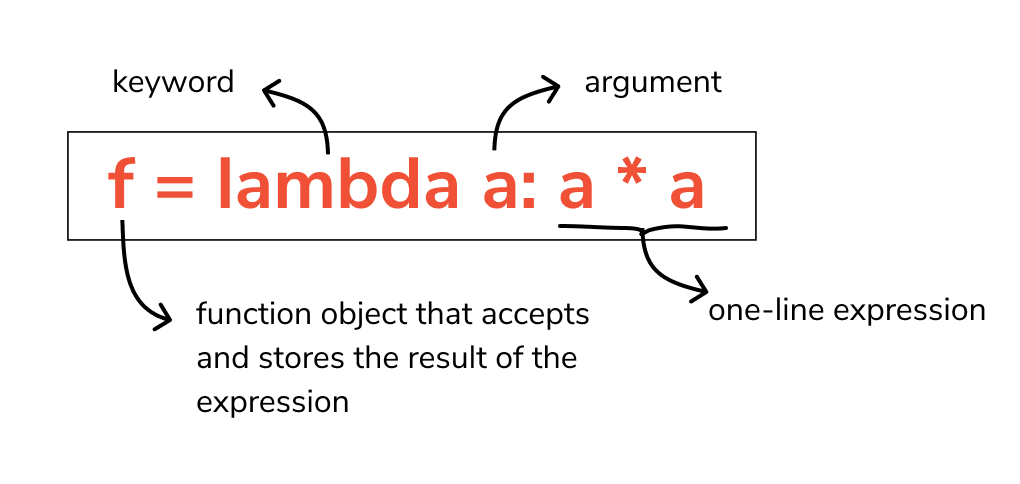


### Clean the Data
- Clean the data by using anonymous function and Regular expression

In [44]:
# Removing the unwanted symbol which is present in Value column in FIFAdata by using lambda Function
Value_in_Million_Euroes = FIFAdata.Value.apply(lambda x: x.replace('€',''))

# Looks the data
Value_in_Million_Euroes

0          5M
1        2.1M
2         29M
3         13M
4       13.5M
5         18M
6        6.5M
7           0
8        6.5M
9        1.9M
10          0
11       3.5M
12        11M
13       3.8M
14      20.5M
15      15.5M
16        24M
17         6M
18        21M
19        10M
20       2.6M
21       6.5M
22         3M
23        28M
24       9.5M
25     122.5M
26        29M
27       3.2M
28      10.5M
29      37.5M
30      94.5M
31        31M
32     103.5M
33        30M
34        10M
35        37M
36         9M
37        17M
38        17M
39       4.7M
40        13M
41        15M
42       9.5M
43        36M
44       3.1M
45      17.5M
46      29.5M
47        12M
48     185.5M
49       7.5M
50      24.5M
51       4.9M
52        17M
53        21M
54      49.5M
55         7M
56      79.5M
57       2.1M
58      27.5M
59        63M
60      27.5M
61        41M
62         7M
63         7M
64      47.5M
65      29.5M
66       3.6M
67        30M
68      16.5M
69     118.5M
70      31.5M
71    

In [45]:
# Removing the unwanted symbol which is present in Value column in FIFAdata by using lambda Function
Value_in_Million_Euroes = Value_in_Million_Euroes.apply(lambda x: x.replace('M',''))
Value_in_Million_Euroes

0          5
1        2.1
2         29
3         13
4       13.5
5         18
6        6.5
7          0
8        6.5
9        1.9
10         0
11       3.5
12        11
13       3.8
14      20.5
15      15.5
16        24
17         6
18        21
19        10
20       2.6
21       6.5
22         3
23        28
24       9.5
25     122.5
26        29
27       3.2
28      10.5
29      37.5
30      94.5
31        31
32     103.5
33        30
34        10
35        37
36         9
37        17
38        17
39       4.7
40        13
41        15
42       9.5
43        36
44       3.1
45      17.5
46      29.5
47        12
48     185.5
49       7.5
50      24.5
51       4.9
52        17
53        21
54      49.5
55         7
56      79.5
57       2.1
58      27.5
59        63
60      27.5
61        41
62         7
63         7
64      47.5
65      29.5
66       3.6
67        30
68      16.5
69     118.5
70      31.5
71       132
72        22
73        53
74       1.8
75      425K
76      45.5

In [46]:
# Removing the unwanted symbol which is present in Wage column in FIFAdata by using lambda Function
Wage_in_MillionEuroes = FIFAdata.Wage.apply(lambda x: x.replace('€',''))
Wage_in_MillionEuroes

0       10K
1       25K
2       77K
3       20K
4       76K
5      105K
6       550
7         0
8       14K
9       13K
10        0
11      11K
12      21K
13       8K
14      55K
15      40K
16      15K
17      19K
18      37K
19      16K
20      11K
21      500
22      12K
23      50K
24      500
25      72K
26       6K
27       1K
28      54K
29      70K
30     130K
31      32K
32     560K
33      46K
34       6K
35      29K
36      10K
37      24K
38       7K
39       7K
40      50K
41      33K
42      15K
43      19K
44       6K
45      95K
46      33K
47      19K
48     160K
49      46K
50       6K
51       6K
52       6K
53       4K
54      82K
55      500
56     115K
57       6K
58      21K
59     220K
60      15K
61      65K
62       2K
63      21K
64      71K
65      35K
66       8K
67      30K
68      81K
69      82K
70      29K
71     270K
72      25K
73      40K
74       2K
75       2K
76      95K
77      25K
78      17K
79      11K
80     210K
81     100K
82       7K
83  

In [47]:
# # Removing the unwanted symbol which is present in Value column in FIFAdata by using lambda Function
Wage_in_Million_Euroes =Wage_in_MillionEuroes.apply(lambda x: x.replace('K',''))
Wage_in_Million_Euroes

0       10
1       25
2       77
3       20
4       76
5      105
6      550
7        0
8       14
9       13
10       0
11      11
12      21
13       8
14      55
15      40
16      15
17      19
18      37
19      16
20      11
21     500
22      12
23      50
24     500
25      72
26       6
27       1
28      54
29      70
30     130
31      32
32     560
33      46
34       6
35      29
36      10
37      24
38       7
39       7
40      50
41      33
42      15
43      19
44       6
45      95
46      33
47      19
48     160
49      46
50       6
51       6
52       6
53       4
54      82
55     500
56     115
57       6
58      21
59     220
60      15
61      65
62       2
63      21
64      71
65      35
66       8
67      30
68      81
69      82
70      29
71     270
72      25
73      40
74       2
75       2
76      95
77      25
78      17
79      11
80     210
81     100
82       7
83      41
84       3
85      59
86      78
87       6
88     500
89       8
90      42

> **Note**
- Now we can see cleaned Columns as Wage_in_Million_Euroes, Value_in_Million_Euroes

In [48]:
FIFAdata["Wage_in_Million_Euroes"] = Wage_in_Million_Euroes
# Data Converted into a DataFrame into FIFAdata DataSet

In [49]:
#df['Age'] = df['Age'].str.strip('[]')

In [50]:
FIFAdata['Value_in_Million_Euroes'] = Value_in_Million_Euroes
# Data Converted into a DataFrame into FIFAdata DataSet

In [51]:
FIFAdata
# Check the data is cleaned we can remove or drop the past named columns

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Value,Wage,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,[19],"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,€5M,€10K,1660,10,5
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,[34],"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,€2.1M,€25K,1842,25,2.1
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,[22],ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,€29M,€77K,1772,77,29
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,[33],"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,€13M,€20K,2134,20,13
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,[30],"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,€13.5M,€76K,2055,76,13.5
5,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184941,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sánchez,[31],"CF, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Inter,€18M,€105K,2106,105,18
6,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",254909,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",O. Dorley,[21],"CDM, LB, LM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SK Slavia Praha,€6.5M,€550,2049,550,6.5
7,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",240225,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",M. Safonov,[21],GK,72,91,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",,€0,€0,1039,0,0
8,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",241928,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sambi Lokonga,[20],"CM, CDM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",RSC Anderlecht,€6.5M,€14K,1936,14,6.5
9,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",193571,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Dodô,[28],"LM, LB",71,71,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Sampdoria,€1.9M,€13K,1932,13,1.9


### Drop()
- Refrence link for Drop() is : https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
- Pandas provide data analysts a way to delete and filter data frame using .drop() method.
- Rows or columns can be removed using index label or column name using this method.
> Parameters:

- labels: String or list of strings referring row or column name.
- axis: int or string value, 0 ‘index’ for Rows and 1 ‘columns’ for Columns.
- index or columns: Single label or list. index or columns are an alternative to axis and cannot be used together.
- level: Used to specify level in case data frame is having multiple level index.
- inplace: Makes changes in original Data Frame if True.
- errors: Ignores error if any value from the list doesn’t exists and drops rest of the values when errors = ‘ignore’

In [52]:
# Remove three columns as index base
#FIFAdata.drop(FIFAdata.columns[["Value", "Wage"]], axis = 1, inplace = True)
# Remove two columns name is "Value", "Wage"
FIFAdata.drop(["Value", "Wage"], axis = 1, inplace = True)

In [53]:
FIFAdata
# After Drop Columns Value and Wage then , Table looks like is below 

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,[19],"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,1660,10,5
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,[34],"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,1842,25,2.1
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,[22],ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,1772,77,29
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,[33],"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,2134,20,13
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,[30],"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,2055,76,13.5
5,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184941,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sánchez,[31],"CF, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Inter,2106,105,18
6,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",254909,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",O. Dorley,[21],"CDM, LB, LM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SK Slavia Praha,2049,550,6.5
7,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",240225,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",M. Safonov,[21],GK,72,91,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",,1039,0,0
8,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",241928,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sambi Lokonga,[20],"CM, CDM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",RSC Anderlecht,1936,14,6.5
9,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",193571,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Dodô,[28],"LM, LB",71,71,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Sampdoria,1932,13,1.9


In [54]:
FIFAdata['Age'] = FIFAdata['Age'].str.join(',')

# if values are in lists then convert the data into string and join method:

In [55]:
FIFAdata

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,19,"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,1660,10,5
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,34,"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,1842,25,2.1
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,22,ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,1772,77,29
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,33,"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,2134,20,13
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,30,"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,2055,76,13.5
5,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184941,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sánchez,31,"CF, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Inter,2106,105,18
6,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",254909,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",O. Dorley,21,"CDM, LB, LM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SK Slavia Praha,2049,550,6.5
7,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",240225,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",M. Safonov,21,GK,72,91,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",,1039,0,0
8,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",241928,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",A. Sambi Lokonga,20,"CM, CDM",73,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",RSC Anderlecht,1936,14,6.5
9,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",193571,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Dodô,28,"LM, LB",71,71,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Sampdoria,1932,13,1.9


### EDA  (Exploratory Data Analysis) :
- **head()**Understand your data using the head() function to look at the first few rows.
- **shape()**Review the dimensions of your data with the shape property.
- **info()**To know the information aboutvthe data
- **Dtyes** Look at the data types for each attribute with the dtypes property.
- **describe**Review the distribution of your data with the describe() function.
- **Correlation** Calculate pairwise correlation between your variables using the corr() function.

In [56]:
FIFAdata.head()

# Checking the first 5 entries of dataset

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,19,"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,1660,10,5
1,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",147777,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",16 A. Arshavin,34,"16, LW, RW",75,75,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Kuban Krasnodar,1842,25,2.1
2,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",231352,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",T. Abraham,22,ST,78,85,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Chelsea,1772,77,29
3,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",189362,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Hulk,33,"RW, ST",80,80,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Shanghai SIPG FC,2134,20,13
4,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",184484,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",G. Sigurðsson,30,"CAM, CM",78,78,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Everton,2055,76,13.5


### info()
> -This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

In [57]:
## To know the information of the dataset

FIFAdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   picture                  120 non-null    object
 1   ID                       120 non-null    object
 2   flag                     120 non-null    object
 3   Name                     120 non-null    object
 4   Age                      120 non-null    object
 5   Position                 120 non-null    object
 6   Overall                  120 non-null    object
 7   Potential                120 non-null    object
 8   Team_image               120 non-null    object
 9   Team                     120 non-null    object
 10  Total_Point              120 non-null    object
 11  Wage_in_Million_Euroes   120 non-null    object
 12  Value_in_Million_Euroes  120 non-null    object
dtypes: object(13)
memory usage: 12.3+ KB


**Note**
- Above the data , having all columns which are in object type , want to convert into other types according to our requriements.

In [58]:
FIFAdata.head(1)

,picture,ID,flag,Name,Age,Position,Overall,Potential,Team_image,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",246785,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",Bryan Gil,19,"LM, RM, CAM",72,82,"https://cdn.sofifa.com/cdn-cgi/image/f=auto,w=...",SD Eibar,1660,10,5


**Note**
- In the above we can drop the three columns like picture , flag and Team Image. Because we can't analysis the website link 

In [59]:
# Remove three columns as index base
#FIFAdata.drop(FIFAdata.columns[["Value", "Wage"]], axis = 1, inplace = True)
# Remove two columns name is "picture", "flag","Team_image"
FIFAdata.drop(["picture", "flag","Team_image"], axis = 1, inplace = True)

In [60]:
FIFAdata.drop(["ID"], axis = 1, inplace = True)

In [61]:
FIFAdata.head(1)

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,Bryan Gil,19,"LM, RM, CAM",72,82,SD Eibar,1660,10,5


In [62]:
print("There are {} rows and {} columns are present in the Data Set".format(FIFAdata.shape[0],FIFAdata.shape[1]))

#printing the rows and columns 

There are 120 rows and 9 columns are present in the Data Set


In [63]:
 FIFAdata.drop([FIFAdata.index[58]], inplace = True)

In [64]:
 FIFAdata.drop([FIFAdata.index[74]], inplace = True)

In [65]:
#### Convert the data type of Pandas column to int

#FIFAdata[["age", "Overall Potential", "Total_Point", "Wage_in_Million_Euroes", "Value_in_Million_Euroes"]].astype(str).astype(int)
# Convert columns into integer type.
FIFAdata["Age"] = FIFAdata["Age"].astype(str).astype(int)
FIFAdata["Overall"] = FIFAdata["Overall"].astype(str).astype(int)
FIFAdata["Potential"] = FIFAdata["Potential"].astype(str).astype(int)
FIFAdata["Total_Point"] = FIFAdata["Total_Point"].astype(str).astype(int)
FIFAdata["Wage_in_Million_Euroes"] = FIFAdata["Wage_in_Million_Euroes"].astype(str).astype(int)
FIFAdata["Value_in_Million_Euroes"] = FIFAdata["Value_in_Million_Euroes"].astype(str).astype(float)

In [66]:
FIFAdata

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,Bryan Gil,19,"LM, RM, CAM",72,82,SD Eibar,1660,10,5.0
1,16 A. Arshavin,34,"16, LW, RW",75,75,Kuban Krasnodar,1842,25,2.1
2,T. Abraham,22,ST,78,85,Chelsea,1772,77,29.0
3,Hulk,33,"RW, ST",80,80,Shanghai SIPG FC,2134,20,13.0
4,G. Sigurðsson,30,"CAM, CM",78,78,Everton,2055,76,13.5
5,A. Sánchez,31,"CF, ST",80,80,Inter,2106,105,18.0
6,O. Dorley,21,"CDM, LB, LM",73,82,SK Slavia Praha,2049,550,6.5
7,M. Safonov,21,GK,72,91,,1039,0,0.0
8,A. Sambi Lokonga,20,"CM, CDM",73,82,RSC Anderlecht,1936,14,6.5
9,Dodô,28,"LM, LB",71,71,Sampdoria,1932,13,1.9


In [67]:
FIFAdata.dtypes

Name                        object
Age                          int32
Position                    object
Overall                      int32
Potential                    int32
Team                        object
Total_Point                  int32
Wage_in_Million_Euroes       int32
Value_in_Million_Euroes    float64
dtype: object

#### Describe()
> **describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.**

In [68]:
FIFAdata.describe()
##describe() is used to view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values.

,Age,Overall,Potential,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,21.347458,77.101695,85.508475,1890.228814,83.127119,28.926271
std,4.062287,5.847623,4.144290,228.670831,140.436471,32.288384
min,16.000000,62.000000,71.000000,933.000000,0.000000,0.000000
25%,18.250000,73.250000,84.000000,1788.750000,10.250000,6.625000
50%,20.000000,77.000000,86.000000,1914.000000,33.000000,17.000000
75%,23.000000,81.000000,88.000000,2034.750000,81.000000,38.250000
max,35.000000,93.000000,95.000000,2312.000000,800.000000,185.500000


## Handling Missing Values

- There are broadly divide into two ways to treat missing values
- 1. Delete --> Delete the missing values

- 2.impute --> 
>- imputting by a simple static: Replace the missing values by another value according to MEAN,MEDIAN,MODE
>- Predictive Techniques: Use statitical models such as K-NN,SVM etc to predict and replace missing values
> fillna


- otherwise deletion is often safer and recongineed . You may loose data but will not make false predections
- Caution : Always have backup of the orginal data .if you are deleting missing values


In [69]:
FIFAdata.isnull().sum()

##isnull(). sum() returns the number of missing values in the data set.

Name                       0
Age                        0
Position                   0
Overall                    0
Potential                  0
Team                       0
Total_Point                0
Wage_in_Million_Euroes     0
Value_in_Million_Euroes    0
dtype: int64

### Bar Graph :  
> **Reference link for Bar Graph :** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- Bar graph that plots data using rectangular bars or columns (called bins) that represent the total amount of observations in the data for that category.
- We can draw in the form of vertical or horizontal rectangular bars.
- It shows the relationship using two axes, in which the categories on one axis and the discrete values on the other axis.

#### missingo 
> - **Reference link for missingo :** https://pypi.org/project/missingno/
- To understand the distribution of missing values through informative visualization

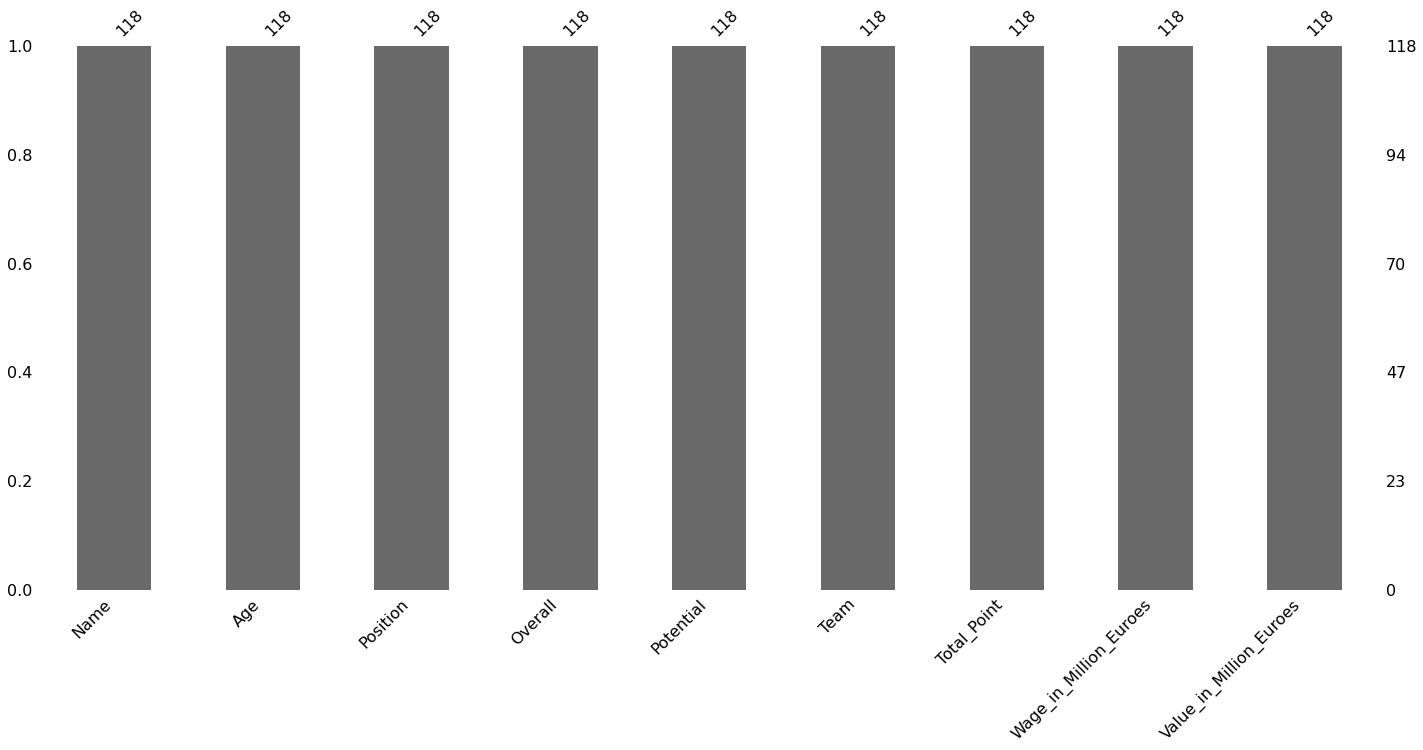

In [70]:
#visualizing the null values for each attribute


import missingno as msno

#msgo ---->  It's also the name of a Python library for the exploratory visualization of missing data.

msno.bar(FIFAdata)
#ploting the bar graph

plt.show()
#Show the image

### Correlation :

**HeatMap** - A heatmap is a graphical representation of data in which data values are represented as colors. That is, it uses color in order to communicate a value to the reader. This is a great tool to assist the audience towards the areas that matter the most when you have a large volume of data.
> Reference link : https://seaborn.pydata.org/generated/seaborn.heatmap.html
>
> - It shows the relationship between two columns or variables
> - if correlation is equal to zero    i.e    No Correlated
> - if correlation is equal to one     i.e    Perfect Correlated
> - if correlation is between less than zero to less than 0.45    i.e    small positive correlated
> - if correlation is between greater than 0.5  to 0.9 then it is   i.e large positive correlated
> - if correlation is negative to -0.45 is    small neagtive correlated
> - if correlation is negative between greater than - 0.5  to - 0.9 then it is   i.e large negative correlated

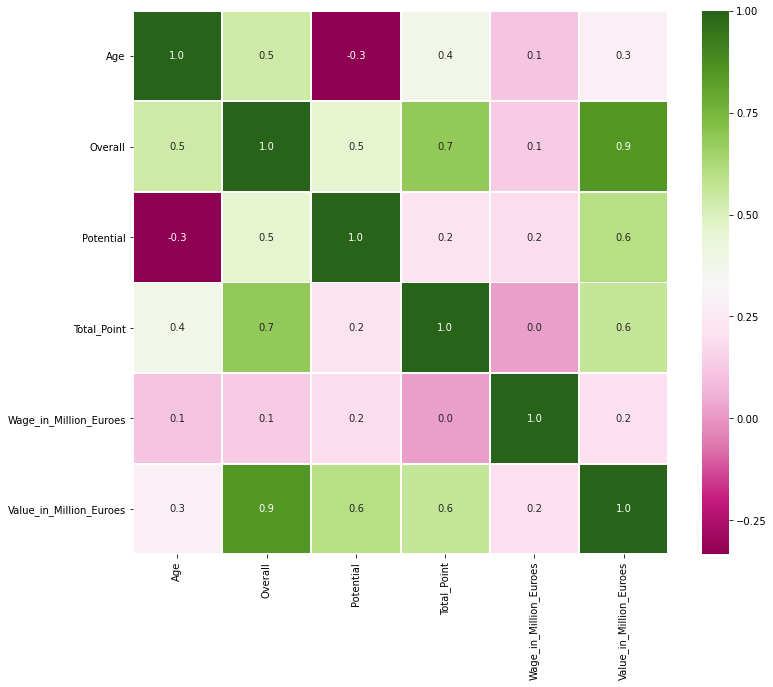

In [71]:
# plotting correlation plot

plt.figure(figsize=(12,10))
#plotting the figure size based on width and height

sns.heatmap(FIFAdata.corr(),cmap='PiYG',annot=True,linewidths=1,fmt='0.1f')
plt.show()

# data: 2D dataset that can be coerced into an ndarray.
# cmap: The mapping from data values to color space.
# annot: If True, write the data value in each cell.
# fmt: String formatting code to use when adding annotations.
# linewidths: Width of the lines that will divide each cell.


### NOTE :-
- There is a Strong Relationship with Overal vs Age and remaining columns also have positive relationship , only for potential has neagtive relationship
- Value_in_Million_Euroes ,Total_point has very strong positive realationship with overal, remaining columns also have +ve relationship.
- Potential has neagtive relationship with age and remaing all +ve relationship

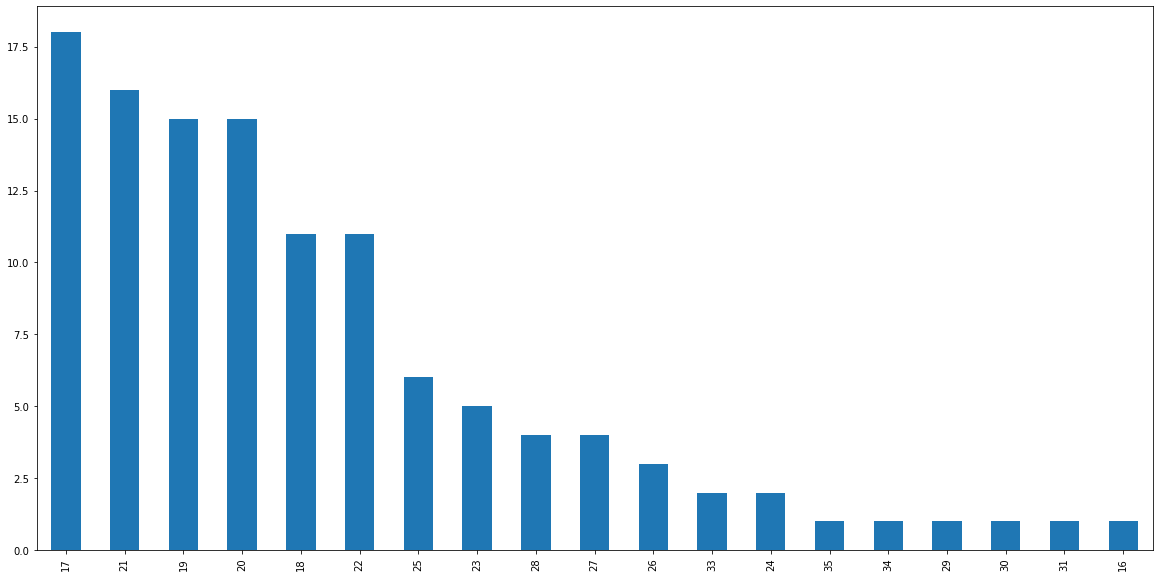

In [76]:
# Figure Size
fig = plt.figure(figsize =(20,10))


# Horizontal Bar Plot
FIFAdata["Age"].value_counts().plot(kind="bar")

#Show the image
plt.show()


**Note**
- Above Graph says how many age people are present in particular age

In [77]:
FIFAdata.head(1)

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,Bryan Gil,19,"LM, RM, CAM",72,82,SD Eibar,1660,10,5.0


**Q1 . Which Person  has Highest Overall Rating ?**

In [89]:
FIFAdata[FIFAdata["Overall"] == FIFAdata["Overall"].max()]["Name"]
# max gives the highest number in the particular column

32     L. Messi
Name: Name, dtype: object

In [90]:
FIFAdata[FIFAdata["Overall"] == FIFAdata["Overall"].max()]
# Display entier row with max

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
32,L. Messi,33,"RW, ST, CF",93,93,FC Barcelona,2231,560,103.5


> **Note :**
-  **L.Messi** Has Highest Overall Rating in FIFA 

**Q2 . Which Person has lowest Overall rating ?**

In [91]:
FIFAdata[FIFAdata["Overall"] == FIFAdata["Overall"].min()]["Name"]
# min gives the lowest number in the particular column

101     B. Arrey-Mbi
Name: Name, dtype: object

In [92]:
FIFAdata[FIFAdata["Overall"] == FIFAdata["Overall"].min()]
# Display entier row with min

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
101,B. Arrey-Mbi,17,"CB, LB",62,85,Bayern München II,1495,500,1.2


> **Note :**
-  **B. Arrey-Mbi** Has Lowest Overall Rating in FIFA 

**Q3. Can i know the Potential  having   more than 90  and how many Persons are avaliable**

In [96]:
FIFAdata[FIFAdata["Potential"] > 90]["Name"]
# Displaying only names to check

7              M. Safonov
16                  Pedri
25             E. Haaland
32               L. Messi
48              K. Mbappé
56               P. Foden
59      Cristiano Ronaldo
69              J. Sancho
71              Neymar Jr
80             F. de Jong
111           M. Rashford
117            K. Havertz
Name: Name, dtype: object

In [97]:
len(FIFAdata[FIFAdata["Potential"] > 90]["Name"])
# know the number of people , so using length method to get the number i.e len()

12

> **NOTE:**
    - There are 12 number of persons having more than 90 potentials

**Q4. If age  is less than 20 and potential  is 90, & Overal 90, List out the Potential , Overal and Person Names and length**

In [102]:
FIFAdata[(FIFAdata["Age"] <= 20) & (FIFAdata["Overall"] >= 85) & (FIFAdata["Potential"] >= 80)][["Age","Name","Overall","Potential"]]

,Age,Name,Overall,Potential
25,19,E. Haaland,87,93
69,20,J. Sancho,87,92


> **NOTE**
- There are only two members thouse are E.Haaland and J.Sancho whose age is less than 20 and having highest Overall and Potential

In [103]:
FIFAdata.head(1)

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,Bryan Gil,19,"LM, RM, CAM",72,82,SD Eibar,1660,10,5.0


**Q5. Find the Name,Age, Position,Team, Whose Totalpoint  is less than  2000 & Potential and Overall is less than 80**

In [104]:
FIFAdata[(FIFAdata["Total_Point"] <= 2000) & (FIFAdata["Overall"] <=80) & (FIFAdata["Potential"] <=80)][["Name","Age", "Position","Team"]]

,Name,Age,Position,Team
1,16 A. Arshavin,34,"16, LW, RW",Kuban Krasnodar
9,Dodô,28,"LM, LB",Sampdoria
10,K. Olsson,25,CM,
11,J. Cajuste,20,"CM, CDM",FC Midtjylland
17,E. Rigoni,27,"RM, ST, LM",Elche CF
22,S. Nsoki,21,"CB, LB",OGC Nice
28,A. Townsend,28,RM,Crystal Palace
44,G. Maroni,21,"CAM, LW, LM",Boca Juniors
49,D. Gray,24,"LW, CF, RW",Bayer 04 Leverkusen
57,M. Fraisl,27,GK,ADO Den Haag


> **Note**
- These are the persons whose Totalpoint  is less than  2000 & Potential and Overall is less than 80

**Q20. Find the Name,Age, Position,Team, Whose Wages  is greater than  7 & Values   is less than 8**

In [105]:
#Wage_in_Million_Euroes	Value_in_Million_Euroes
FIFAdata[(FIFAdata["Wage_in_Million_Euroes"] >= 7) & (FIFAdata["Value_in_Million_Euroes"] <=8)]

,Name,Age,Position,Overall,Potential,Team,Total_Point,Wage_in_Million_Euroes,Value_in_Million_Euroes
0,Bryan Gil,19,"LM, RM, CAM",72,82,SD Eibar,1660,10,5.0
1,16 A. Arshavin,34,"16, LW, RW",75,75,Kuban Krasnodar,1842,25,2.1
6,O. Dorley,21,"CDM, LB, LM",73,82,SK Slavia Praha,2049,550,6.5
8,A. Sambi Lokonga,20,"CM, CDM",73,82,RSC Anderlecht,1936,14,6.5
9,Dodô,28,"LM, LB",71,71,Sampdoria,1932,13,1.9
11,J. Cajuste,20,"CM, CDM",70,80,FC Midtjylland,1865,11,3.5
13,O. Kossounou,19,"CB, RB",71,82,Club Brugge KV,1604,8,3.8
17,E. Rigoni,27,"RM, ST, LM",75,75,Elche CF,1927,19,6.0
20,E. Salcedo,18,"CF, ST",67,83,Hellas Verona,1563,11,2.6
21,J. Gvardiol,18,"CB, LB",73,87,Dinamo Zagreb,1942,500,6.5


> **Note**
- These are the persons whose Wages is greater than 7 & Values is less than 8

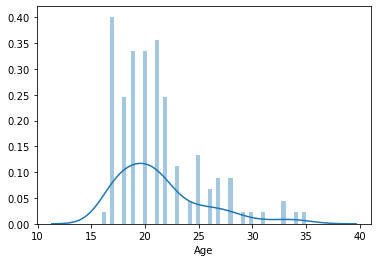

In [106]:
sns.distplot(FIFAdata['Age'], bins = 50)

### Bar Graph
>  - **Refrence link for bar Graph:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 
- The bar plots can be plotted horizontally or vertically.
- A bar chart describes the comparisons between the discrete categories. 
- One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.
### Pie chart
>  - **Refrence link for pie chart:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
> - A pie chart is a circular graph which displays data in an easy-to-read pie slice format. Each slice represents a category of data and the size is proportional to the quantity it represents
>
#### value_counts
> - value_counts() function returns object containing counts of unique values
- The objects start from descending order


### Bar Graph
>  - **Refrence link for bar Graph:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 
- The bar plots can be plotted horizontally or vertically.
- A bar chart describes the comparisons between the discrete categories. 
- One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.
### Pie chart
>  - **Refrence link for pie chart:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html
> - A pie chart is a circular graph which displays data in an easy-to-read pie slice format. Each slice represents a category of data and the size is proportional to the quantity it represents
>
#### value_counts
> - value_counts() function returns object containing counts of unique values
- The objects start from descending order


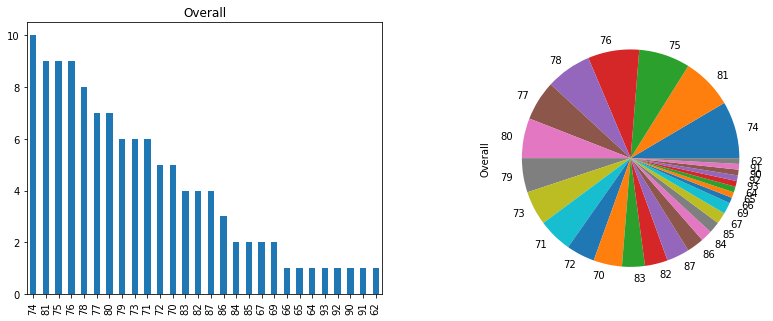

In [109]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
#pi = df["Ram"].value_counts()
plt.title("Overall")
FIFAdata["Overall"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
FIFAdata["Overall"].value_counts().plot(kind = "pie")

plt.show()


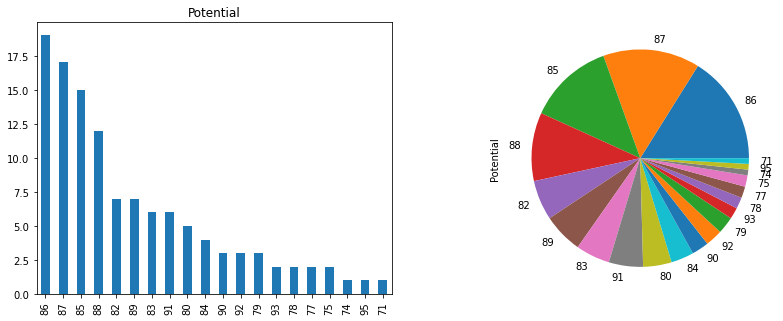

In [110]:
plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
#pi = df["Ram"].value_counts()
plt.title("Potential")
FIFAdata["Potential"].value_counts().plot(kind = "bar")
plt.subplot(1,2,2)
FIFAdata["Potential"].value_counts().plot(kind = "pie")

plt.show()


#### value_counts
> - value_counts() function returns object containing counts of unique values
- The objects start from descending order

### Bar Graph
>  - **Refrence link for bar Graph:** https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html
- A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent. 
- The bar plots can be plotted horizontally or vertically.
- A bar chart describes the comparisons between the discrete categories. 
- One of the axis of the plot represents the specific categories being compared, while the other axis represents the measured values corresponding to those categories.

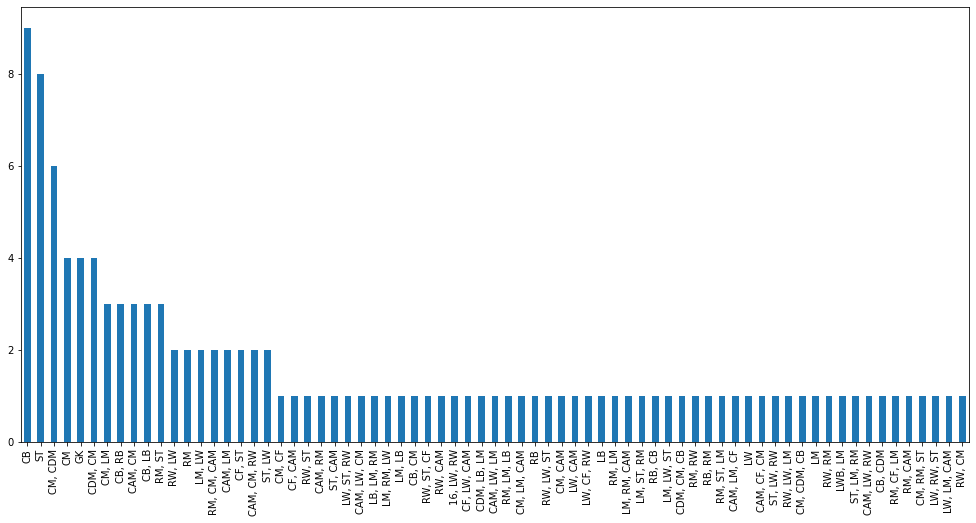

In [113]:
plt.figure(figsize = (17,8))
FIFAdata["Position"].value_counts().plot(kind = "bar")
plt.show()

### Relplot :
> - **Reference link for Relplot :** https://seaborn.pydata.org/generated/seaborn.relplot.html
-  Seaborn though is to use the relplot() function which stands for Relational Plot, essentially, plotting the relationship between variables

<Figure size 1224x576 with 0 Axes>

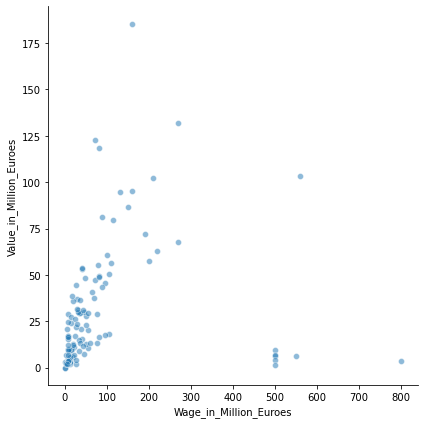

In [134]:
plt.figure(figsize = (17,8))
sns.relplot(x = "Wage_in_Million_Euroes", y = "Value_in_Million_Euroes", sizes=(40, 400), alpha=.5, palette="muted",height=6,  data= FIFAdata)
plt.show()

 # Front_Camera VS FRont_Camera

### Violin Plots
- **Reference link for Violin Plot is :** https://seaborn.pydata.org/generated/seaborn.violinplot.html
- Violin plots are similar to box plots, except that they also show the probability density of the data at different values. 
- These plots include a marker for the median of the data and a box indicating the interquartile range, as in the standard box plots

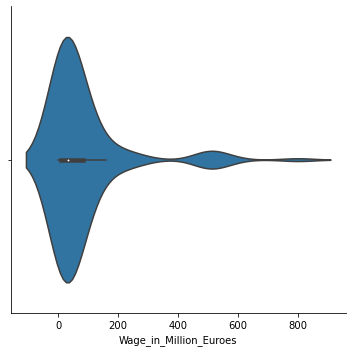

In [137]:
sns.catplot(x="Wage_in_Million_Euroes",
            kind="violin", data= FIFAdata)

 # Ploting the violin plot to know how the data is distrubed entire in this graph

###  BOX Plot for better Visualization
> - **Reference for the BoxPlot:** https://seaborn.pydata.org/generated/seaborn.boxplot.html
> - A boxplot summarizes the distribution of a numeric variable for one or several groups. It allows to quickly get the median, quartiles and outliers but also hides the dataset individual data points
> - BOX plot of MILES and MINUTES split by PURPOSE

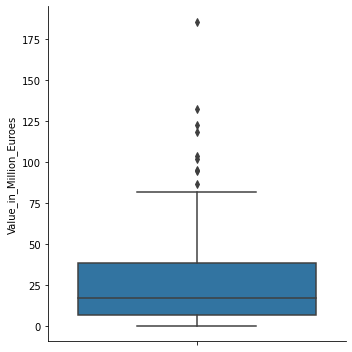

In [142]:
plt.figure(figsize=(16,7))
# plot the figure and mentioning the size of fig size (width, height)

sns.catplot(y="Value_in_Million_Euroes",
            kind="box", data= FIFAdata)

 # Plot the box using seaborn as sns